In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [6]:
df = pd.read_csv('../Data/data_cleaned.csv')
df = df.drop(columns=['Unnamed: 0'])

In [7]:
country_to_numeric = {'Sub-Saharan Africa': 1, 'Central and Eastern Europe': 2, 'Latin America and Caribbean': 3, 
                     'Western Europe': 4, 'Middle East and Northern Africa': 5, 'Southeastern Asia': 6,
                     'Southern Asia': 7, 'Eastern Asia': 8, 'North America': 9, 'Australia and New Zealand': 10}

df['region'] = df['region'].replace(country_to_numeric)

In [8]:
X = df.drop(columns=['country', 'region'])
Y = df['region']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, stratify=Y)

In [9]:
level_1_models = [         
    ('logreg_pipe', Pipeline([
        ('logreg', LogisticRegression(C=10, class_weight=None, penalty='l1', max_iter=10_000, solver='liblinear'))
    ])),
     ('knn_pipe', Pipeline([
        ('ss', StandardScaler(with_mean=False)),
        ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=3, weights='distance'))
    ])),
    ('rf_pipe', Pipeline([
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, min_samples_leaf=1))
    ]))
]

stack = StackingClassifier(estimators=level_1_models, final_estimator=RandomForestClassifier())

In [10]:
cross_val_score(stack, X_train, y_train).mean()

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Spencer\anaconda3\lib\site-

0.8835010060362173

In [11]:
stack.fit(X_train, y_train);
stack.score(X_train, y_train), stack.score(X_test, y_test)

(0.9857954545454546, 0.9067796610169492)

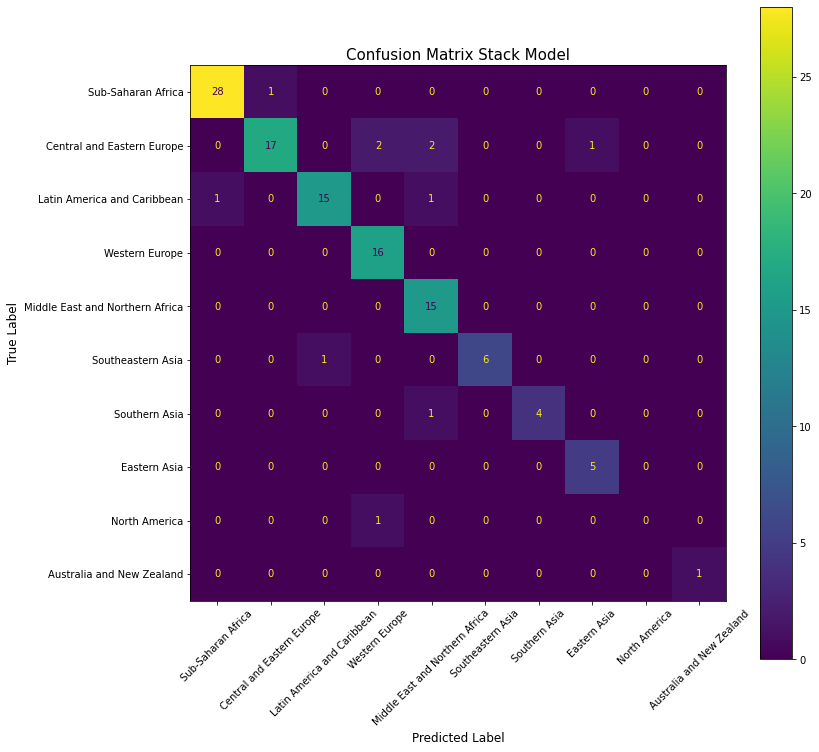

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(stack, X_test, y_test, display_labels=['Sub-Saharan Africa', 'Central and Eastern Europe', 'Latin America and Caribbean', 
                     'Western Europe', 'Middle East and Northern Africa', 'Southeastern Asia',
                     'Southern Asia', 'Eastern Asia', 'North America', 'Australia and New Zealand'], cmap='viridis', ax=ax)
plt.xticks(rotation=45)
plt.title('Confusion Matrix Stack Model', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);
plt.savefig('../Visualizations/StackConfMatr.png', bbox_inches='tight')

In [13]:
y_pred = stack.predict(X_test)

In [14]:
# Inspiration https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.83
Macro Recall: 0.83
Macro F1-score: 0.82

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.90


C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Sub-Saharan Africa', 'Central and Eastern Europe', 'Latin America and Caribbean', 
                     'Western Europe', 'Middle East and Northern Africa', 'Southeastern Asia',
                     'Southern Asia', 'Eastern Asia', 'North America', 'Australia and New Zealand']))


Classification Report

                                 precision    recall  f1-score   support

             Sub-Saharan Africa       0.97      0.97      0.97        29
     Central and Eastern Europe       0.94      0.77      0.85        22
    Latin America and Caribbean       0.94      0.88      0.91        17
                 Western Europe       0.84      1.00      0.91        16
Middle East and Northern Africa       0.79      1.00      0.88        15
              Southeastern Asia       1.00      0.86      0.92         7
                  Southern Asia       1.00      0.80      0.89         5
                   Eastern Asia       0.83      1.00      0.91         5
                  North America       0.00      0.00      0.00         1
      Australia and New Zealand       1.00      1.00      1.00         1

                       accuracy                           0.91       118
                      macro avg       0.83      0.83      0.82       118
                   weight

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
